# Housing Price Prediction
This [dataset](https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/data) contains 50,000 rows and 6 columns this will be expanded in the future for the model.

Some limitations of the dataset are that it is a synthetic dataset and does not contain any real-world information.
 
These are some things that would help to improve the model for the real world.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

In [2]:
df = pd.read_csv('../Data/housing_price.csv')

In [3]:
#checking first 5 rows
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


# Explaining whats in the dataset
- SquareFeet: The size of the house in square feet.
- Bedrooms: How many bedrooms the house has.
- Bathrooms: Number of bathrooms.
- Neighborhood: Whether the house is in a rural, suburban, or urban area.
- YearBuilt: The year the house was built.
- Price: The price of the house.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
# checking for null values
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

# No null values, lets check for outliers

In [6]:
df['Price'].describe()

count     50000.000000
mean     224827.325151
std       76141.842966
min      -36588.165397
25%      169955.860225
50%      225052.141166
75%      279373.630052
max      492195.259972
Name: Price, dtype: float64

# Descriptive Statistics

- The average (mean) price of a house is about 224,827.
- The standard deviation is around 76,142. This tells us how spread out the prices are.
- The minimum price is strangely -36,588. This is an issue. why do we have negative prices?
- The maximum price is about 492,195.

In [7]:
#There are 22 negative prices in the dataset.
df.sort_values(by='Price').head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33666,1013,5,2,Urban,1960,-36588.165397
17706,1080,5,1,Rural,1955,-28774.998022
1266,1024,2,2,Urban,2006,-24715.242482
8720,1235,3,1,Urban,1952,-24183.000515
5118,1140,4,1,Urban,2020,-23911.003119


In [8]:
negative_price = (df['Price'] < 0).sum()
percentage_negative_price = (negative_price / len(df)) * 100
percentage_negative_price

0.044000000000000004

I'm going to remove all the negative prices because they are 0.044% of the dataset.

In [9]:
#This effectively removes any rows where the 'Price' value is negative
df = df[df['Price'] >= 0]

In [10]:
#Making sure there are no negative prices
df.sort_values(by='Price').head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
40144,1006,2,1,Suburb,1973,154.779120
17216,1013,2,1,Suburb,2018,276.063516
36235,1112,3,1,Suburb,1978,2360.274450
29980,1005,3,3,Urban,1978,2697.849758
23662,1256,3,1,Rural,1978,3000.859614


so I have removed all the negative prices

In [11]:
#lets also check to make sure we have no duplicates 
df.duplicated().sum()

0

# This is a understanding of how the IQR works
- First Quartile (Q1): This is indeed the median of the first half of the dataset. It marks the point below which 25% of the data points lie.
- Third Quartile (Q3): This is the median of the second half of the dataset, marking the point below which 75% of the data points lie.
- IQR - Q3 - Q1: This represents the middle 50% of the data, the range between the first and third quartiles.

In [12]:
#I now want to use the Interquartile Range to check for outliers
#This is to identify the low price outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
outlier_threshold = Q1 - 1.5 * IQR
outliers = df[df['Price'] < outlier_threshold]

In [14]:
outlier_count = outliers.shape[0]
outlier_precentage = (outlier_count / df.shape[0]) * 100
outlier_summary = outliers.describe()

outlier_threshold, outlier_count, outlier_precentage, outlier_summary

(5924.978392378485,
 7,
 0.014006162711593101,
         SquareFeet  Bedrooms  Bathrooms    YearBuilt        Price
 count     7.000000  7.000000   7.000000     7.000000     7.000000
 mean   1076.428571  2.714286   1.285714  1984.857143  2601.820301
 std      90.834753  0.755929   0.755929    18.224787  1982.541903
 min    1005.000000  2.000000   1.000000  1967.000000   154.779120
 25%    1009.500000  2.000000   1.000000  1975.500000  1318.168983
 50%    1041.000000  3.000000   1.000000  1978.000000  2697.849758
 75%    1107.000000  3.000000   1.000000  1990.000000  3463.858317
 max    1256.000000  4.000000   3.000000  2018.000000  5796.058628)

Summary of Outliers:

- Square Feet: The average size is around 1,076 square feet.
- Bedrooms: On average, there are about 2.7 bedrooms.
- Bathrooms: The average is approximately 1.3 bathrooms.
- Year Built: The average year of construction is around 1984.
- Price: The price range for these outliers is from 154.78 to 5,796, with the mean at around 2,601.82.

In [15]:
#this is to remove the outliers
df = df[df['Price'] >= outlier_threshold]

In [16]:
df.sort_values(by='Price').head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
15131,1178,4,2,Urban,2010,6124.032174
34761,1042,2,2,Urban,2014,6360.211403
46100,1003,3,1,Suburb,1981,7850.236271
4993,1161,2,2,Suburb,1972,8336.559189
5426,1492,3,1,Suburb,1970,9255.923304


These prices, while on the lower end, they might be familys that sold them to other family members or some other reasons.

Just a recap of what I've done so far is as follows:
- checked for null values
- removed negative prices
- checked for duplicates there were none
- checked for outliers and removed them

looks like we are dealing with a relatively clean dataset now


In [17]:
# for reusability im going to make a clean copy of the data
#df.to_csv('../Data/cleaned_price.csv')

# Making Visualizations using the cleaned data.

In [18]:
cleandf = pd.read_csv('../Data/cleaned_price.csv')

In [19]:
cleandf.head()

,Unnamed: 0,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0,2126,4,1,Rural,1969,215355.283618
1,1,2459,3,2,Rural,1980,195014.221626
2,2,1860,2,1,Suburb,1970,306891.012076
3,3,2294,2,1,Urban,1996,206786.787153
4,4,2130,5,2,Suburb,2001,272436.239065


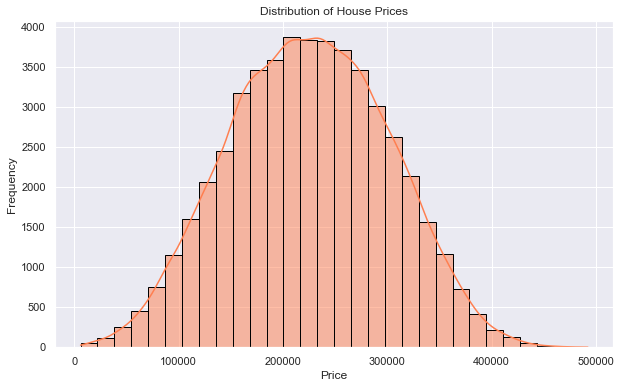

In [47]:
#Histogram of Housing Prices
sns.set(style="darkgrid")

# Histogram of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(cleandf['Price'], kde=True, bins=30 , color='coral', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 Exhibits a skewed distribution of house prices, with a tail indicating the presence of higher or lower-priced outliers. This skewness suggests a concentration of houses in lower price ranges with some expensive properties.

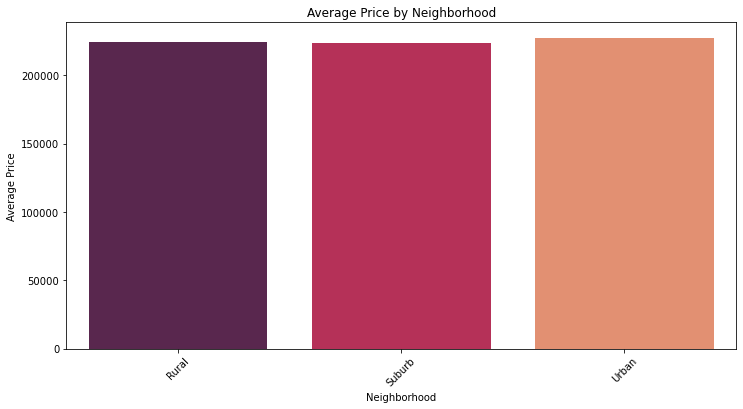

In [21]:
#Bar Plot of Average Price by Neighborhood
plt.figure(figsize=(12, 6))
avg_price_neighborhood = cleandf.groupby('Neighborhood')['Price'].mean().reset_index()
sns.barplot(data=avg_price_neighborhood, x='Neighborhood', y='Price', palette="rocket")
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

This bar plot compares average house prices across neighborhoods, showing that the prices are relatively even across different areas. This uniformity suggests a balanced market value of properties regardless of their neighborhood classification.

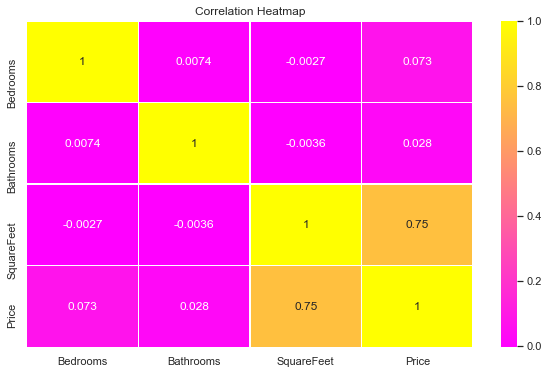

In [54]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_features = cleandf[['Bedrooms', 'Bathrooms', 'SquareFeet', 'Price']].corr()
sns.heatmap(corr_features, annot=True, cmap='spring', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Here is a breakdown of the correlation plot:
- Bedrooms and Price: A weak positive correlation (0.07). This suggests that an increase in the number of bedrooms has a slightly positive but weak relationship with the price.
- Bathrooms and Price: Also a weak positive correlation (0.03). This indicates that the number of bathrooms has a minimal influence on the price.
- Square Feet and Price: A strong positive correlation (0.75). This is significant and suggests that as the square footage of a property increases, its price tends to increase substantially. This is the most pronounced correlation observed in your dataset.

The other correlations among 'Bedrooms', 'Bathrooms', and 'Square Feet' are negligible, indicating these features are relatively independent of each other in terms of their numerical values. ​   
    

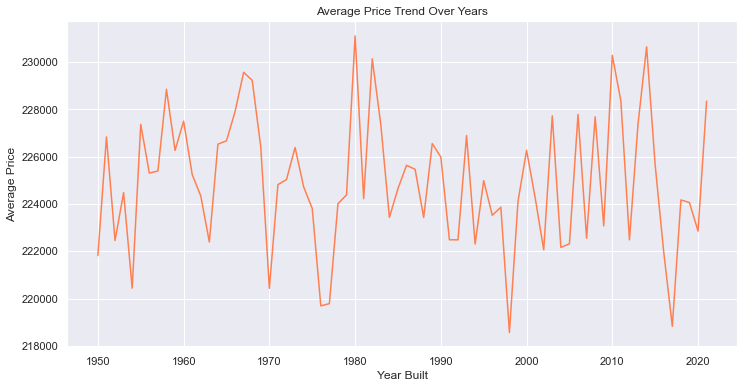

In [55]:
#Line Plot of Average Price by Year Built
plt.figure(figsize=(12, 6))
avg_price_year = cleandf.groupby('YearBuilt')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_year, x='YearBuilt', y='Price' , color='coral')
plt.title('Average Price Trend Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.show()

: This line plot shows the change in average property prices over different construction years. It illustrates how prices have evolved over time, indicating trends like increasing or decreasing values. This trend is useful for understanding historical price variations in relation to the year properties were built.

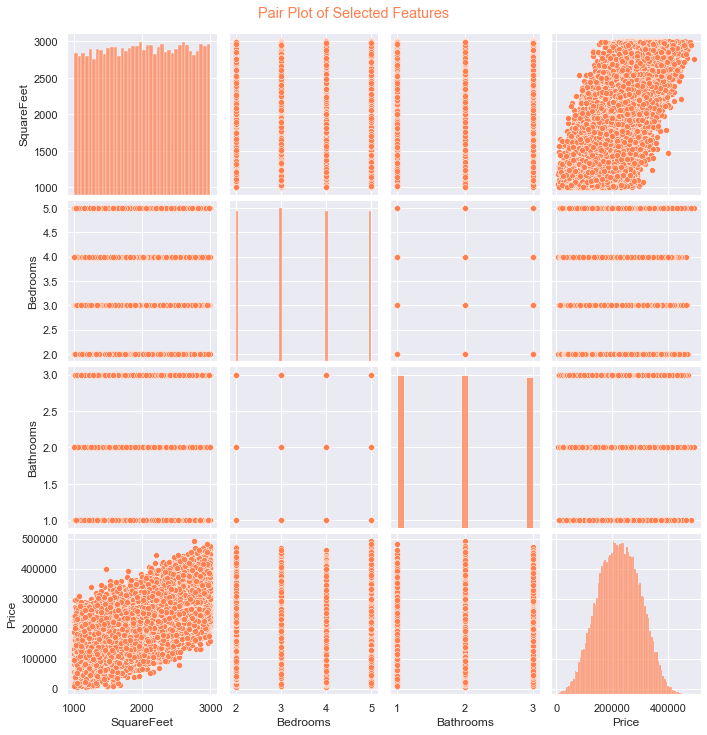

In [71]:
selected_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Price']

# Creating the pair plot
sns.pairplot(cleandf[selected_features], plot_kws={'color': 'coral'}, diag_kws={'color': 'coral'})
plt.suptitle('Pair Plot of Selected Features', y=1.02, color='coral')
plt.show()

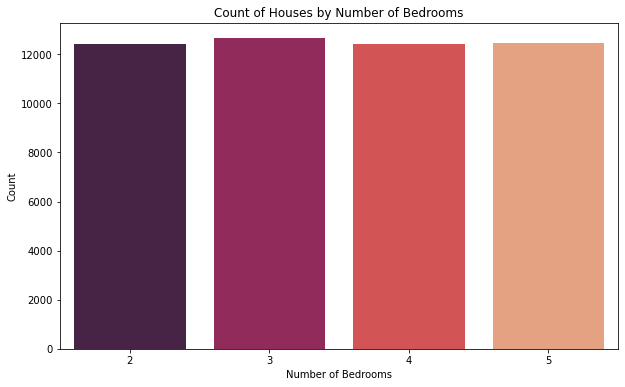

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleandf, x='Bedrooms', palette="rocket")
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

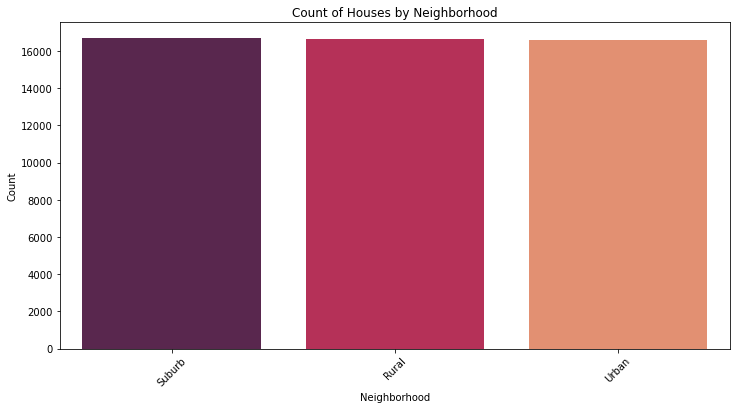

In [27]:
#Bar Plot of Count of Houses by Neighborhood
plt.figure(figsize=(12, 6))
neighborhood_counts = cleandf['Neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Count']
sns.barplot(data=neighborhood_counts, x='Neighborhood', y='Count', palette="rocket")
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


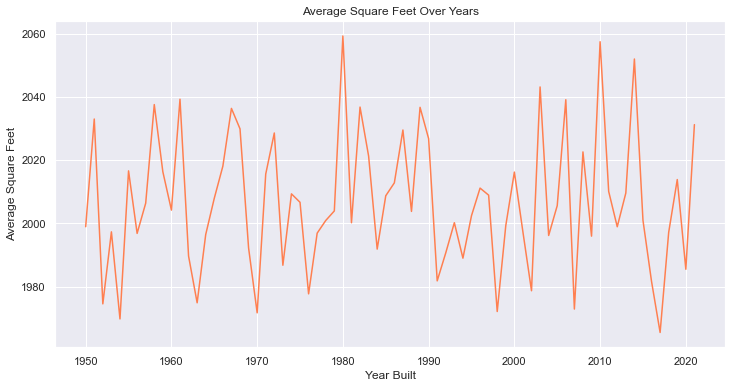

In [56]:
#Line Plot of Average Square Feet by Year Built
plt.figure(figsize=(12, 6))
avg_sqft_year = cleandf.groupby('YearBuilt')['SquareFeet'].mean().reset_index()
sns.lineplot(data=avg_sqft_year, x='YearBuilt', y='SquareFeet', color='coral')
plt.title('Average Square Feet Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Square Feet')
plt.show()

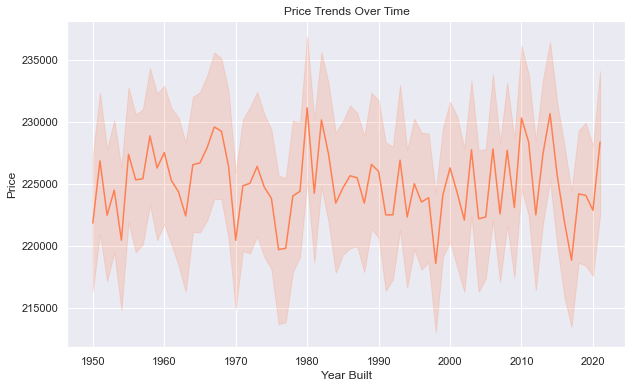

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearBuilt', y='Price', data=cleandf , color='coral')
plt.title('Price Trends Over Time')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()